In [ ]:
!pip install pandas

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
# transformations to be applied on images

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = datasets.MNIST('./data', download=True, train=True, transform=transform)
testset = datasets.MNIST('./', download=True, train=False, transform=transform)

In [4]:
# defining trainloader and testloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [5]:
# shape of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


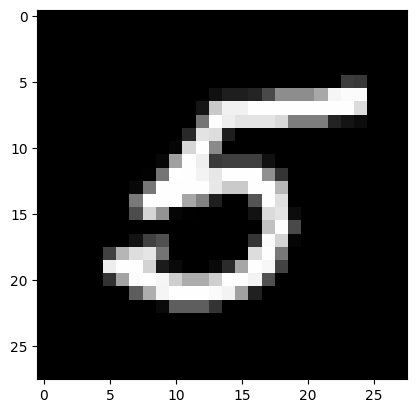

In [6]:
# visualizing the training images
plt.imshow(images[0].numpy().squeeze(), cmap='gray')

In [7]:
# shape of validation data
dataiter = iter(testloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [8]:
# defining the model architecture
class Net(nn.Module):   
  def __init__(self):
      super(Net, self).__init__()

      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
          # Defining another 2D convolution layer
          nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
      )

      self.linear_layers = nn.Sequential(
          nn.Linear(4 * 7 * 7, 10)
      )

  # Defining the forward pass    
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x

In [9]:
# defining the model
model = Net()

# defining the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# defining the loss function
criterion = nn.CrossEntropyLoss()

# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [10]:
# defining another model for repeating experiments
clone_model = Net()

# defining the optimizer
clone_optimizer = optim.Adam(clone_model.parameters(), lr=0.01)

# defining the loss function
clone_criterion = nn.CrossEntropyLoss()

# checking if GPU is available
if torch.cuda.is_available():
    model = clone_model.cuda()
    criterion = criterion.cuda()
    
print(clone_model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [11]:
from torch.utils.tensorboard import SummaryWriter

# default logging directory  `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist_experiment_1')

In [12]:
for i in range(10):
    running_loss = 0
    for images, labels in trainloader:

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()

        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(trainloader)))

Epoch 1 - Training loss: 0.1780502938452973
Epoch 2 - Training loss: 0.09955049493262715
Epoch 3 - Training loss: 0.08381874605850466
Epoch 4 - Training loss: 0.07948213281047378
Epoch 5 - Training loss: 0.07555315790967003
Epoch 6 - Training loss: 0.073250983731011
Epoch 7 - Training loss: 0.06899676838396256
Epoch 8 - Training loss: 0.06818097358498015
Epoch 9 - Training loss: 0.06710958647688649
Epoch 10 - Training loss: 0.06633078245205809


In [13]:
len(trainloader)

938

In [15]:
EPOCHS = 10
# re_running_loss = 0.0

for epoch in range(EPOCHS):
    re_running_loss = 0.0
    for j, data in enumerate(trainloader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        images, labels = data

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()

        # Training pass
        clone_optimizer.zero_grad()
        
        output = clone_model(images)
        re_loss = clone_criterion(output, labels)
        
        #This is where the model learns by backpropagating
        re_loss.backward()
        
        #And optimizes its weights here
        clone_optimizer.step()
        
        re_running_loss += re_loss.item()
        
    else:
        # ...log the running loss
        writer.add_scalar('training loss',
                        re_running_loss/len(trainloader),
                        epoch * len(trainloader) + j)
        print("Epoch {} - Training loss: {}".format(epoch+1, re_running_loss/len(trainloader)))
        
# print('Finished Training')

Epoch 1 - Training loss: 0.07145242515389424
Epoch 2 - Training loss: 0.06927091663088729
Epoch 3 - Training loss: 0.06643059225837344
Epoch 4 - Training loss: 0.06375929225905876
Epoch 5 - Training loss: 0.06352798278524932
Epoch 6 - Training loss: 0.062429925124756674
Epoch 7 - Training loss: 0.06025601808570756
Epoch 8 - Training loss: 0.0591739564333538
Epoch 9 - Training loss: 0.05714046873133888
Epoch 10 - Training loss: 0.05828014985228311


In [16]:
# getting predictions on test set and measuring the performance
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    img = images[i].view(1, 1, 28, 28)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.cpu()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9355


In [17]:
# getting predictions on test set and measuring the performance
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    img = images[i].view(1, 1, 28, 28)
    with torch.no_grad():
        logps = clone_model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.cpu()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9455
